In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#loading the dataset
data=pd.read_csv("advertising.csv")

In [3]:
#loading the top five record
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
#loading the bottom five record
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
#displaying the size of dataset
data.size

800

In [6]:
data.ndim

2

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
data.shape

(200, 4)

In [10]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
data.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [12]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         TV  Radio  Newspaper  Sales
0    False  False      False  False
1    False  False      False  False
2    False  False      False  False
3    False  False      False  False
4    False  False      False  False
..     ...    ...        ...    ...
195  False  False      False  False
196  False  False      False  False
197  False  False      False  False
198  False  False      False  False
199  False  False      False  False

[200 rows x 4 columns]>

In [13]:
data.isnull().sum()*100/data.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

In [14]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [15]:
X=data.iloc[:,1:14]
X

,Radio,Newspaper,Sales
0,37.8,69.2,22.1
1,39.3,45.1,10.4
2,45.9,69.3,12.0
3,41.3,58.5,16.5
4,10.8,58.4,17.9
...,...,...,...
195,3.7,13.8,7.6
196,4.9,8.1,14.0
197,9.3,6.4,14.8
198,42.0,66.2,25.5


In [16]:
Y=data.iloc[:,-1]
Y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [17]:
 #visualizing the dataset using differnet type of graph for better understanding

C:\Users\reliance digitial\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\reliance digitial\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\reliance digitial\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

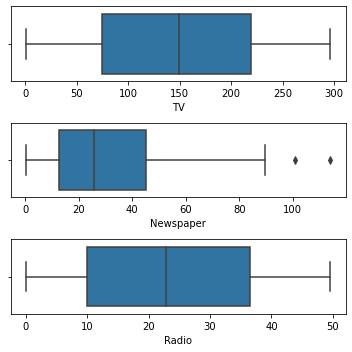

In [18]:
fig, axs = plt.subplots(3,figsize = (5,5))
plt1 = sns.boxplot(data['TV'],ax = axs[0])
plt1 = sns.boxplot(data['Newspaper'],ax = axs[1])
plt1 = sns.boxplot(data['Radio'],ax = axs[2])
plt.tight_layout()

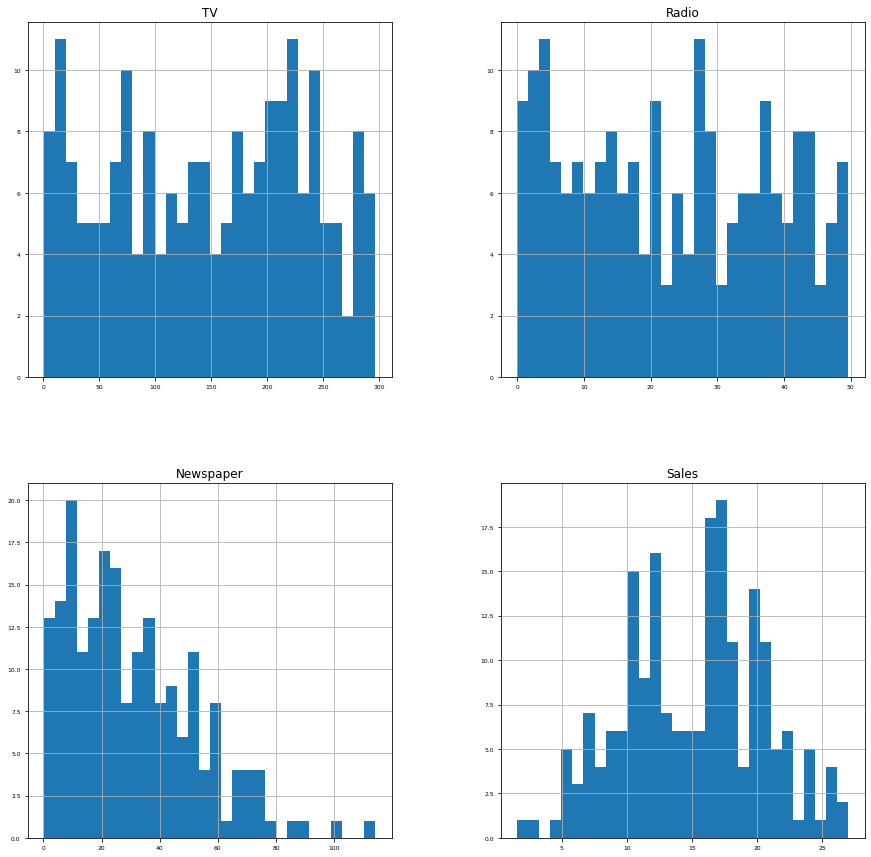

In [19]:
data.hist(figsize=(15,15),bins=30,xlabelsize=6,ylabelsize=6);

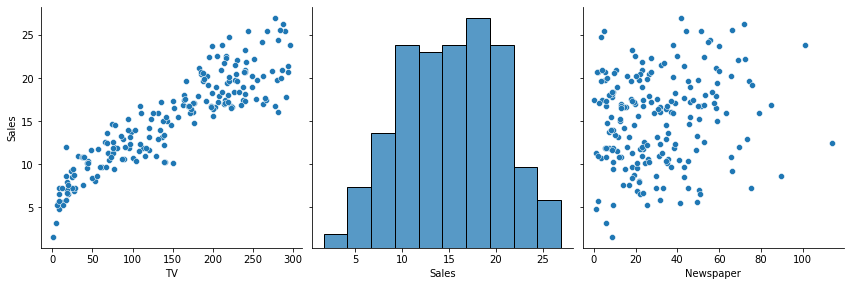

In [20]:
sns.pairplot(data,x_vars=['TV','Sales','Newspaper'],y_vars='Sales',height=4,aspect=1,kind='scatter')
plt.show()

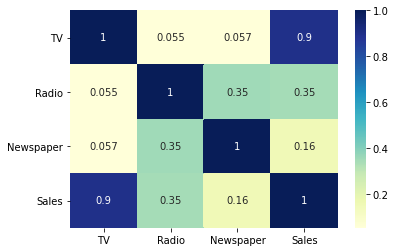

In [21]:
sns.heatmap(data.corr(),cmap="YlGnBu",annot = True)
plt.show()

<AxesSubplot:ylabel='Frequency'>

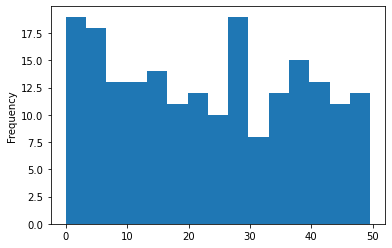

In [22]:
data['Radio'].plot.hist(bins=15)

<AxesSubplot:ylabel='Radio'>

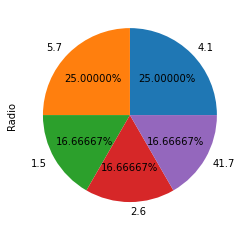

In [23]:
data['Radio'].value_counts().head().plot(kind = 'pie',autopct = '%5.5f%%')

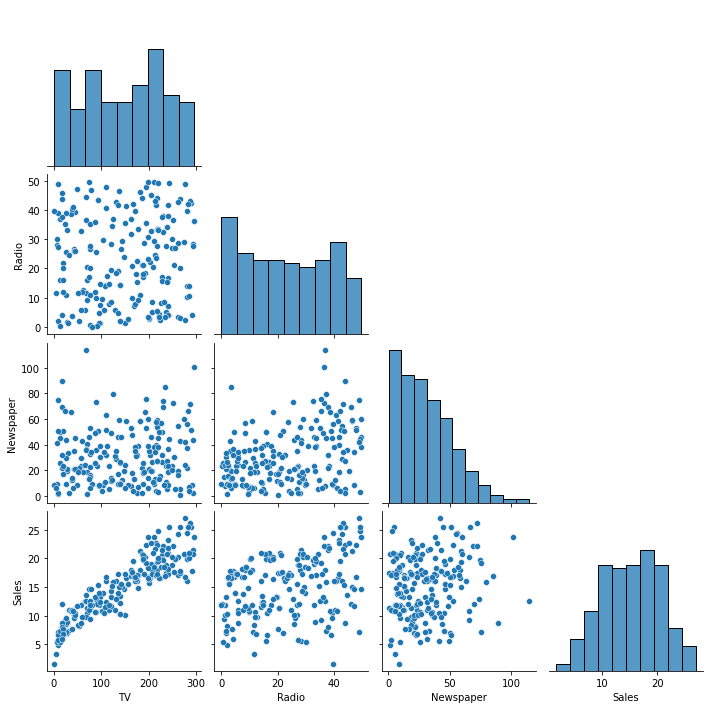

In [24]:
sns.pairplot(data,corner=True)

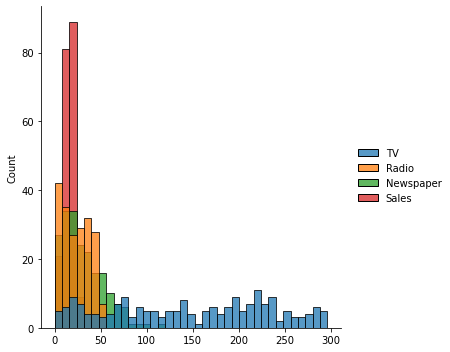

In [25]:
sns.displot(data)

<AxesSubplot:ylabel='Frequency'>

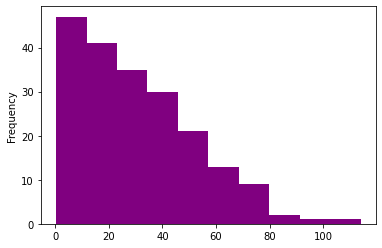

In [26]:
data['Newspaper'].plot.hist(bins=10,color="purple",xlabel="newpaper")

In [27]:
#standardscalar().this function is used to standardize the dat values into a standard format.

In [28]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()
data['Sales']=Sc.fit_transform(pd.DataFrame(data['Sales']))

In [29]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,1.322319
1,44.5,39.3,45.1,-0.897515
2,17.2,45.9,69.3,-0.593948
3,151.5,41.3,58.5,0.259834
4,180.8,10.8,58.4,0.525455


In [30]:
data.shape

(200, 4)

In [31]:
#checking whether duplicate value are present
data.duplicated().any()

False

In [32]:
#creating a Logistic regression
#modelling
from sklearn.model_selection import train_test_split

In [33]:
#splitting the dataset into training and testing
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 3)
(80, 3)
(120,)
(80,)


In [34]:
X_train

,Radio,Newspaper,Sales
12,35.1,65.9,-1.125190
16,36.6,114.0,-0.499083
101,36.3,100.9,1.644859
120,26.8,46.2,0.070105
45,22.5,31.5,0.183943
...,...,...,...
87,40.6,63.2,0.164970
103,17.2,17.9,0.866968
67,14.5,10.2,-0.328327
24,12.6,18.3,-1.030325


In [35]:
y_test

126   -1.618486
104    1.056698
99     0.392645
92     0.810049
111    1.265400
         ...   
146    0.582374
199    0.620320
10    -0.480110
20     0.544428
165    0.335726
Name: Sales, Length: 80, dtype: float64

In [36]:
#linear regression
from sklearn.linear_model import LinearRegression
Lr=LinearRegression()

In [37]:
Lr.fit(X_train,y_train)

LinearRegression()

In [38]:
y_predic=Lr.predict(X_test)

In [39]:
y_predic

array([-1.61848617,  1.05669758,  0.39264488,  0.81004944,  1.26539986,
        0.39264488, -0.55600184,  0.29778021,  1.41718334,  1.36026454,
       -0.61292065,  0.86696824, -1.22005455,  1.03772465, -0.8595688 ,
       -0.21448902,  0.41161781,  0.29778021,  0.54442835, -0.61292065,
        0.43059075, -0.78367706,  1.37923747,  0.37367194,  1.01875172,
        1.81561496,  0.84799531, -0.72675825,  1.05669758,  0.01318619,
       -0.29038076, -0.72675825, -0.66983945,  0.90491411, -1.27697335,
       -0.17654316, -0.3662725 ,  0.29778021,  0.25983434,  0.96183291,
        0.37367194,  0.37367194,  0.44956368,  0.39264488, -0.3662725 ,
       -0.8595688 , -1.22005455,  0.71518476, -0.87854173, -1.42875683,
        0.27880727,  0.16496967, -0.48011011,  0.16496967,  0.62032009,
       -0.89751466, -1.75129672, -1.06827108,  0.27880727, -0.34729957,
        0.35469901,  0.25983434,  1.41718334, -0.02475968, -0.21448902,
       -0.61292065,  0.41161781, -0.4231913 , -1.61848617,  0.62

In [40]:
y_test

126   -1.618486
104    1.056698
99     0.392645
92     0.810049
111    1.265400
         ...   
146    0.582374
199    0.620320
10    -0.480110
20     0.544428
165    0.335726
Name: Sales, Length: 80, dtype: float64

In [41]:
Lr.coef_

array([-6.05869681e-18, -1.10012755e-17,  1.00000000e+00])

In [42]:
Lr.intercept_

4.996003610813204e-16

In [43]:
#checking the performance of regression model....

In [44]:
#mean squared error(mse)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_predic)
mse

2.0398607376598933e-31

In [45]:
#mean asbsolute error(mae)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_predic)
mae

3.5908775952719907e-16

In [46]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_predic)
r2

1.0